In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, GRU, Input, Flatten, LSTM, Conv1D, MaxPooling1D, GlobalMaxPooling1D, Input, Embedding, Bidirectional
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2

In [4]:
corpus = pd.read_csv('../data/corpus.csv').drop(columns='Unnamed: 0')

In [5]:
corpus = corpus.drop(columns='full_text')[corpus['subreddit']!='Anxiety']
corpus = corpus[['neg','neu','pos','comp','class']]
corpus

,neg,neu,pos,comp,class
0,0.087,0.830,0.083,-0.0258,0
1,0.164,0.726,0.110,-0.8376,0
2,0.033,0.863,0.104,0.9637,0
3,0.032,0.617,0.351,0.9429,0
4,0.000,1.000,0.000,0.0000,0
...,...,...,...,...,...
59995,0.045,0.741,0.213,0.8750,1
59996,0.122,0.815,0.063,-0.8086,1
59997,0.310,0.690,0.000,-0.6597,1
59998,0.208,0.671,0.121,-0.9787,1


In [124]:
X = corpus.drop(columns = 'class')
y = corpus['class']

In [125]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [126]:
model_s = Sequential()

model_s.add(Input(shape=(X_train.shape[1],)))
model_s.add(Dense(64,activation='relu'))
model_s.add(Dropout(0.5))
model_s.add(Dense(64,activation='relu'))
model_s.add(Dropout(0.5))
model_s.add(Dense(32,activation='relu'))

model_s.add(Dense(1,activation='sigmoid'))

#Architechture might be too simple here, make it (a bit) more robust and see if accuracy improves
#Also go back and set things up so sample for this sentiment-based test is the same as the bERT test and compare.

In [127]:
model_s.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [128]:
history_s = model_s.fit(X_train,y_train, validation_data=(X_test,y_test), epochs=200, verbose=0)

In [129]:
np.mean(history_s.history['val_accuracy'])

0.7785509994626045

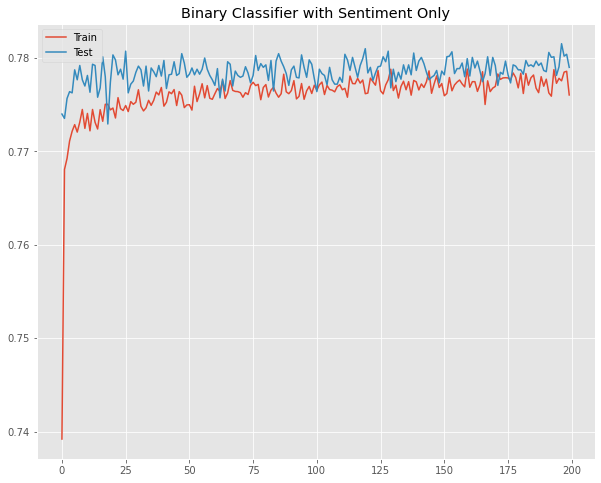

In [130]:
plt.figure(figsize=(10,8))
plt.plot(history_s.history['accuracy'], label='Train')
plt.plot(history_s.history['val_accuracy'], label='Test')
plt.title('Binary Classifier with Sentiment Only')
plt.legend()

In [131]:
sentence = ["I am deliciously depressed"]

In [132]:
analyzer = SentimentIntensityAnalyzer()

In [133]:
sents = pd.DataFrame(analyzer.polarity_scores(sentence),index=[0])

In [134]:
model_s.predict(sents)

array([[0.6760391]], dtype=float32)